In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow

In [4]:
# 난수 생성
rand = tf.random.uniform(shape = [1], minval = 0, maxval = 1)
print(rand)
print(rand.shape)

tf.Tensor([0.13912058], shape=(1,), dtype=float32)
(1,)


In [5]:
rand.shape

TensorShape([1])

In [6]:
# 난수 4개 생성
rand = tf.random.uniform(shape = [4], minval = 0, maxval = 1)
print(rand)
print(rand.shape)

tf.Tensor([0.11660087 0.8668778  0.24520183 0.49381554], shape=(4,), dtype=float32)
(4,)


In [8]:
# 정규분포 난수
rand = tf.random.normal(shape = [4], mean = 0, stddev=1)
print(rand)
print(rand.shape)

tf.Tensor([ 0.22576885 -0.9359582   0.87600756 -0.93361926], shape=(4,), dtype=float32)
(4,)


In [9]:
rand = tf.random.uniform(shape = [4])
print(rand)

rand = tf.random.normal(shape = [4])
print(rand)

tf.Tensor([0.86232877 0.17276824 0.58508766 0.74418163], shape=(4,), dtype=float32)
tf.Tensor([ 0.419864   -0.99400854  0.23147337  0.01541339], shape=(4,), dtype=float32)


In [10]:
for i in rand:
    print(i)

tf.Tensor(0.419864, shape=(), dtype=float32)
tf.Tensor(-0.99400854, shape=(), dtype=float32)
tf.Tensor(0.23147337, shape=(), dtype=float32)
tf.Tensor(0.015413388, shape=(), dtype=float32)


## 텐서플로 프로그램

In [12]:
# 텐서플로로 변수 만들기
w = tf.Variable(2.0)
b = tf.Variable(0.7)
x= 1.5
y = w*x +b
print(y)

tf.Tensor(3.7, shape=(), dtype=float32)


In [13]:
if y ==3.7:
    print('good')

good


## 회귀모델 만들기

In [21]:
x = [1,2,3,4,5,6,7,8,9,10]
y = [3,5,5,6,7,7,8,9,9,10]

In [22]:
w = tf.Variable(tf.random.normal(shape = [1]))
b = tf.Variable(tf.random.normal(shape = [1]))

In [23]:
def compute_loss():
    y_pred = w * x + b
    loss = tf.reduce_mean((y-y_pred)**2)
    return loss

In [24]:
print(compute_loss())

tf.Tensor(36.509148, shape=(), dtype=float32)


## 모델 훈련

In [25]:
# optimizer
# rmsprop, adam의 기본 학습률은 0.001
optimizer = tf.optimizers.Adam(learning_rate= 0.7)

for i in range(1000):
    optimizer.minimize(compute_loss, var_list = [w,b])
    
    if i% 100 ==0:
        print(i, "loss : ", compute_loss().numpy(), '\n')
print("final w :", w)
print("final b :", b)

0 loss :  1.6046782 

100 loss :  0.14225629 

200 loss :  0.1418182 

300 loss :  0.14181817 

400 loss :  0.1418182 

500 loss :  0.1418182 

600 loss :  0.1418182 

700 loss :  0.1418182 

800 loss :  0.1418182 

900 loss :  0.1418182 

final w : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.7090908], dtype=float32)>
final b : <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>


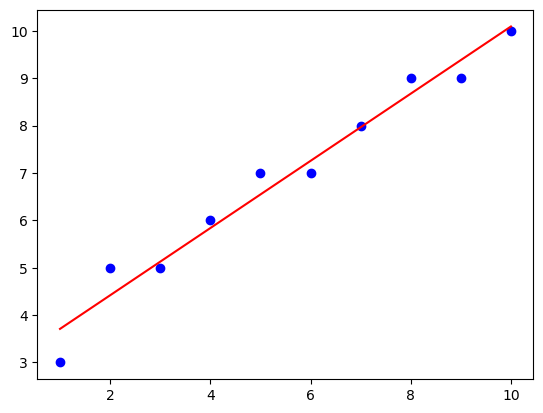

In [27]:
plt.plot(x,y, 'bo')
plt.plot(x, w*x+b,'red')
plt.show()

## 예측 모델 생성

In [29]:
# 신경망 네트워크를 이용한 모델 생성
model = tf.keras.Sequential()
# 은닉 1층
model.add(tf.keras.layers.Dense(units=10, activation='tanh', input_dim=1))
# 출력층
model.add(tf.keras.layers.Dense(units=1))

In [30]:
# optimizer
# learning rate를 지정해줄 필요가 있을 때 객체 생성
opt = tf.keras.optimizers.Adam(learning_rate=0.07)
model.compile(loss='mse', optimizer= opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x,y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 40.6887
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 30.2441
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 20.8816
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 13.5102
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.7001
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.7735
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 4.1545
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.3785
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.0997
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.1295
Epoch 11/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.3179
Epoch 12/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.5232
Epoch 13/1000
1/1 [==========================

1/1 [==============================] - 0s 6ms/step - loss: 0.0859
Epoch 104/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0854
Epoch 105/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0850
Epoch 106/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0847
Epoch 107/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0842
Epoch 108/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0839
Epoch 109/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0835
Epoch 110/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0831
Epoch 111/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0828
Epoch 112/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0824
Epoch 113/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0821
Epoch 114/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0818
Epoch 115/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0712
Epoch 205/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0712
Epoch 206/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0712
Epoch 207/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0711
Epoch 208/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0711
Epoch 209/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0711
Epoch 210/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0710
Epoch 211/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0710
Epoch 212/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0710
Epoch 213/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0709
Epoch 214/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0709
Epoch 215/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.0709
Epoch 216/1000
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 0.0689
Epoch 306/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0689
Epoch 307/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0689
Epoch 308/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0688
Epoch 309/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0688
Epoch 310/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 311/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 312/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0688
Epoch 313/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 314/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 315/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0687
Epoch 316/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0687
Epoch 317/1000
1/1 [=======================

1/1 [==============================] - 0s 5ms/step - loss: 0.0673
Epoch 407/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 408/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0672
Epoch 409/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0672
Epoch 410/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0672
Epoch 411/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0672
Epoch 412/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 413/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0672
Epoch 414/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0671
Epoch 415/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0671
Epoch 416/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0671
Epoch 417/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0671
Epoch 418/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 508/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 509/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0660
Epoch 510/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 511/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0660
Epoch 512/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 513/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0660
Epoch 514/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0659
Epoch 515/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0659
Epoch 516/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0659
Epoch 517/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 518/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 519/1000
1/1 [=======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0666
Epoch 609/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0661
Epoch 610/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0653
Epoch 611/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0663
Epoch 612/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0658
Epoch 613/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0652
Epoch 614/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0660
Epoch 615/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0657
Epoch 616/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0652
Epoch 617/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0658
Epoch 618/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0655
Epoch 619/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0651
Epoch 620/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0640
Epoch 710/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0640
Epoch 711/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0640
Epoch 712/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0640
Epoch 713/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0640
Epoch 714/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0640
Epoch 715/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0639
Epoch 716/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0639
Epoch 717/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0639
Epoch 718/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0639
Epoch 719/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0639
Epoch 720/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0639
Epoch 721/1000
1/1 [======================

1/1 [==============================] - 0s 7ms/step - loss: 0.0690
Epoch 811/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0683
Epoch 812/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0633
Epoch 813/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0671
Epoch 814/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0668
Epoch 815/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0633
Epoch 816/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0659
Epoch 817/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0657
Epoch 818/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0633
Epoch 819/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0652
Epoch 820/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0649
Epoch 821/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0633
Epoch 822/1000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.0620
Epoch 912/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0620
Epoch 913/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0619
Epoch 914/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0619
Epoch 915/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0619
Epoch 916/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0619
Epoch 917/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0619
Epoch 918/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0619
Epoch 919/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0619
Epoch 920/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0619
Epoch 921/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0619
Epoch 922/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0618
Epoch 923/1000
1/1 [======================

In [32]:
model.predict(x)

1/1 [==============================] - 2s 2s/step


array([[3.0104809],
       [4.7989674],
       [5.3346434],
       [5.95669  ],
       [6.6528416],
       [7.3519964],
       [8.028221 ],
       [8.683624 ],
       [9.309719 ],
       [9.8813095]], dtype=float32)

In [33]:
y

[3, 5, 5, 6, 7, 7, 8, 9, 9, 10]

1/1 [==============================] - 0s 35ms/step


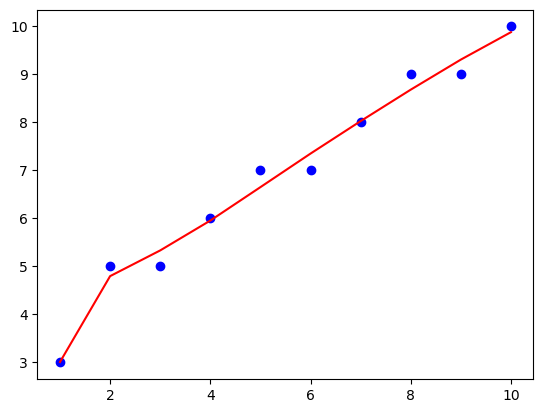

In [34]:
plt.plot(x,y,'bo')
plt.plot(x, model.predict(x),'red')
plt.show()

In [35]:
from tf.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [39]:
np.set_printoptions(linewidth=np.inf)

In [40]:
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

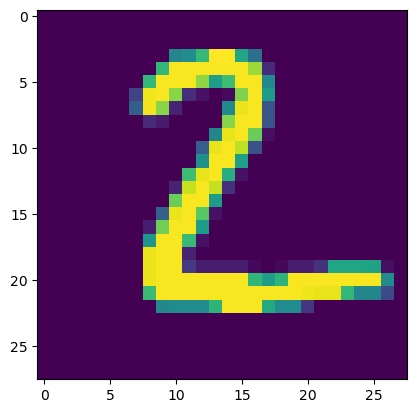

In [41]:
plt.imshow(test_images[1])

In [48]:
print(test_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [62]:
# data slicing
my_slice = test_images[0:100,:,:]
my_point = test_images[1,1,1]

In [60]:
len(my_slice)

100

In [61]:
len(my_slice[0])

28

In [64]:
print(my_point)

0


### 라벨 정보 출력

In [65]:
print(len(train_labels), len(test_labels))

60000 10000


In [66]:
print(train_labels, test_labels, sep = '\n')

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


In [68]:
print(max(train_labels), min(train_labels))

9 0


In [69]:
print(max(test_labels), min(test_labels))

9 0


In [74]:
from keras import models, layers

In [75]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape = (28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [77]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop',metrics = ['accuracy'])

In [76]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [80]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [81]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.2870 - accuracy: 0.9198
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1263 - accuracy: 0.9632
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9746
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9813
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0506 - accuracy: 0.9848


In [82]:
x = np.array(12)

In [83]:
print(x, type(x), x.ndim)

12 <class 'numpy.ndarray'> 0


In [84]:
x = np.array([12,3,6,7,14])
print(x, type(x), x.ndim)

[12  3  6  7 14] <class 'numpy.ndarray'> 1


In [86]:
x = np.array([[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]])
print(x, type(x), x.ndim)

[[12  3  6  7 14]
 [10  5  8 13  8]
 [11  6  7 12  7]] <class 'numpy.ndarray'> 2


In [87]:
x = np.array([[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]],[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]],[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]]])
print(x, type(x), x.ndim)

[[[12  3  6  7 14]
  [10  5  8 13  8]
  [11  6  7 12  7]]

 [[12  3  6  7 14]
  [10  5  8 13  8]
  [11  6  7 12  7]]

 [[12  3  6  7 14]
  [10  5  8 13  8]
  [11  6  7 12  7]]] <class 'numpy.ndarray'> 3


# 연습문제 
+ 4D 텐서를 만들어 보시오.

In [89]:
x = np.array([[[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]],[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]],[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]]],[[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]],[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]],[[12,3,6,7,14],[10,5,8,13,8],[11,6,7,12,7]]]])
print(x.ndim)

4


In [90]:
y = np.array([[[[1]]]])
print(y.ndim)

4
